# One Class SVM | Novelty Detection

In [1]:
%matplotlib inline

import numpy as np  
import pandas as pd  
from sklearn import utils
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [2]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [3]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size


In [4]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


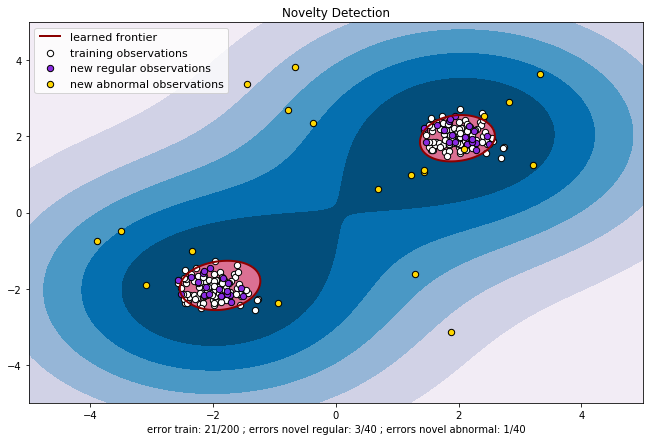

In [5]:
plt.figure(figsize=(11,7))
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

In [6]:
# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html'
data = pd.read_csv('kddcup.csv', low_memory=False, header=None, prefix='c', index_col=None)

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
c2 - service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
c11 - logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.

In [7]:
data.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
data.shape

(494021, 42)

In [9]:
data.describe()

,c0,c4,c5,c6,c7,c8,c9,c10,c11,c12,...,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# extract just the logged-in HTTP accesses from the data
data = data[data['c2'] == 'http']  
data = data[data['c11'] == 1]

In [11]:
data

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0,normal.


In [12]:
data.columns[0]

'c0'

In [13]:
cols = data.columns
cols

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10',
       'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20',
       'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30',
       'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40',
       'c41'],
      dtype='object')

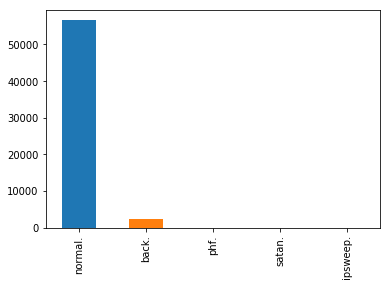

In [14]:
# let's take a look at the types of attack labels are present in the data.
data.c41.value_counts().plot(kind='bar')  

In [15]:
# the full dataset contains features for SMTP, NDP, ICMP, etc.
# here we'll grab just the relevant features for HTTP.
# duration, src_bytes, dst_bytes, label
relevant_features = [  
    'c0',
    'c4',
    'c5',
    'c41'
]

In [16]:
# replace the data with a subset containing only the relevant features
data = data[relevant_features]

In [17]:
data.columns = ['duration', 'src_bytes', 'dst_bytes', 'label']

In [18]:
data.describe()

,duration,src_bytes,dst_bytes
count,58725.000000,58725.000000,5.872500e+04
mean,0.686641,2282.454593,4.658200e+03
std,14.394064,10259.946866,1.982101e+04
min,0.000000,0.000000,0.000000e+00
25%,0.000000,218.000000,6.860000e+02
50%,0.000000,253.000000,1.724000e+03
75%,0.000000,309.000000,5.053000e+03
max,1440.000000,54540.000000,3.916592e+06


In [19]:
data.head()

,duration,src_bytes,dst_bytes,label
0,0,181,5450,normal.
1,0,239,486,normal.
2,0,235,1337,normal.
3,0,219,1337,normal.
4,0,217,2032,normal.


In [20]:
data.tail()

,duration,src_bytes,dst_bytes,label
494016,0,310,1881,normal.
494017,0,282,2286,normal.
494018,0,203,1200,normal.
494019,0,291,1200,normal.
494020,0,219,1234,normal.


In [21]:
# normalise the data - this leads to better accuracy and reduces numerical instability in
# the SVM implementation
ndata = pd.DataFrame()
ndata["duration"] = np.log((data["duration"] + 0.1).astype(float))  
ndata["src_bytes"] = np.log((data["src_bytes"] + 0.1).astype(float))  
ndata["dst_bytes"] = np.log((data["dst_bytes"] + 0.1).astype(float))
ndata["label"] = data["label"]

In [22]:
ndata.head()

,duration,src_bytes,dst_bytes,label
0,-2.302585,5.199049,8.603389,normal.
1,-2.302585,5.476882,6.186414,normal.
2,-2.302585,5.460011,7.198258,normal.
3,-2.302585,5.389528,7.198258,normal.
4,-2.302585,5.380358,7.616825,normal.


In [23]:
# we're using a one-class SVM, so we need.. a single class. the dataset 'label'
# column contains multiple different categories of attacks, so to make use of 
# this data in a one-class system we need to convert the attacks into
# class 1 (normal) and class -1 (attack)
ndata.loc[data['label'] == "normal.", "attack"] = 1  
ndata.loc[data['label'] != "normal.", "attack"] = -1

In [24]:
target = ndata["attack"]

In [25]:
# find the proportion of outliers we expect (aka where `attack == -1`). because 
# target is a series, we just compare against itself rather than a column.
outliers = target[target == -1]  
print("outliers.shape", outliers.shape)  
print("outlier fraction", outliers.shape[0]/target.shape[0])

outliers.shape (2209,)
outlier fraction 0.03761600681140911


In [26]:
# drop label columns from the dataframe. we're doing this so we can do 
# unsupervised training with unlabelled data. we've already copied the label
# out into the target series so we can compare against it later.
ndata.drop(["label", "attack"], axis=1, inplace=True)

In [27]:
# check the shape for sanity checking.
ndata.shape

(58725, 3)

In [28]:
ndata.head()

,duration,src_bytes,dst_bytes
0,-2.302585,5.199049,8.603389
1,-2.302585,5.476882,6.186414
2,-2.302585,5.460011,7.198258
3,-2.302585,5.389528,7.198258
4,-2.302585,5.380358,7.616825


In [29]:
# training

from sklearn.model_selection import train_test_split  

In [30]:
train_data, test_data, train_target, test_target = train_test_split(ndata, target, test_size = 0.25)  
train_data.shape

(44043, 3)

In [31]:
from sklearn import svm

In [32]:
# set nu (which should be the proportion of outliers in our dataset)
nu = outliers.shape[0] / target.shape[0]  
print("nu", nu)

model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.00005)  
model.fit(train_data)

nu 0.03761600681140911


OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=5e-05, kernel='rbf',
      max_iter=-1, nu=0.03761600681140911, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

In [33]:
from sklearn import metrics

In [34]:
# accuracy / predictions

preds = model.predict(train_data)  
targs = train_target

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

accuracy:  0.9771586858297573
precision:  0.9987467161553107
recall:  0.9774962847639941
f1:  0.9880072481045253
area under curve (auc):  0.9729905666244213


In [35]:
# test data

preds = model.predict(test_data)  
targs = test_target

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

accuracy:  0.9762975071516142
precision:  0.9989134371604491
recall:  0.9764214402039226
f1:  0.9875393869951303
area under curve (auc):  0.9747939043595643


In [36]:
# To use the model outside of our development environment 
# we need to save it to disk. Fortunately this is quite straight forward:

outputfile = 'oneclass_v1.model'

from sklearn.externals import joblib  
joblib.dump(model, outputfile, compress=9) 

['oneclass_v1.model']

In [37]:
# dodo.json
'''
{
	"duration": [0],
	"src_bytes": [239],
	"dst_bytes": [486]
}
'''

'\n{\n\t"duration": [0],\n\t"src_bytes": [239],\n\t"dst_bytes": [486]\n}\n'

In [38]:
# To use the model on new data (e.g. in JSON format) 
# we could do something like this:
import json

with open('dodo.json') as f:
    jdata = json.load(f)

djf = pd.DataFrame(jdata)

In [39]:
djf

,duration,src_bytes,dst_bytes
0,0,239,486


In [40]:
djf.dtypes

duration     int64
src_bytes    int64
dst_bytes    int64
dtype: object

In [41]:
djf[['duration', 'src_bytes', 'dst_bytes']] = djf[['duration', 'src_bytes', 'dst_bytes']].astype(float)

In [42]:
# normalise the data - this leads to better accuracy and reduces numerical instability in
# the SVM implementation
djf_pred = pd.DataFrame()
djf_pred["duration"] = np.log((djf["duration"] + 0.1).astype(float))  
djf_pred["src_bytes"] = np.log((djf["src_bytes"] + 0.1).astype(float))  
djf_pred["dst_bytes"] = np.log((djf["dst_bytes"] + 0.1).astype(float))

In [43]:
model.predict(djf_pred)

array([1], dtype=int64)

In [44]:
djf_pred2 = pd.DataFrame({
	"duration": [0],
	"src_bytes": [0],
	"dst_bytes": [0]
})

In [45]:
model.predict(djf_pred2)

array([-1], dtype=int64)

In [46]:
djf_pred3 = pd.DataFrame({
	"duration": [0],
	"src_bytes": [1038],
	"dst_bytes": [0]
})

In [47]:
model.predict(djf_pred3)

array([-1], dtype=int64)

### References

1. Unsupervised Machine Learning with One-class Support Vector Machines <br/>
https://thisdata.com/blog/unsupervised-machine-learning-with-one-class-support-vector-machines/

2. One-class SVM with non-linear kernel (RBF) <br/>
http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html